In [27]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet')

In [28]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

#image path 원하는 이미지 경로를 넣으시면 됩니다.
img_path ='./results/dream.png'

img = image.load_img(img_path, target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [29]:
seo_image_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(seo_image_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

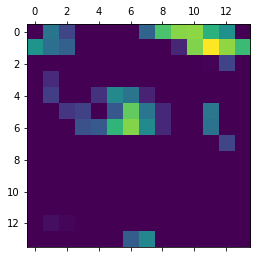

In [30]:
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [31]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

#위의 히트맵이 적용된 이미지가 만들어서 생성될 경로를 적어주세요.
cv2.imwrite('./results/seo_cam.jpg', superimposed_img)

True

In [19]:
print('Hello, Matt', 'Hello, Matt', 'Hello, Matt', sep = '\n')

Hello, Matt
Hello, Matt
Hello, Matt


In [ ]:
print('Hello, Multicampus')